In [1]:
# Machine learning API
import tensorflow as tf

# Image array processing
import cv2
import numpy as np
import matplotlib.pyplot as plt

# other
import os

# my library
from model import build_model
from data import get_data_list, get_dataset

In [2]:
LOG_DIR = r'.\log'
DIRECTORY_AM = r'D:\jacky\dataset\gd\*\*_A.png'
DIRECTORY_PH = r'D:\jacky\dataset\gd\*\*_P.png'

TRAIN_BATCH_SIZE = 1
TRAIN_EPOCHS = 5

IMAGE_HEIGHT = 64
IMAGE_WIDTH = 64

os.makedirs(LOG_DIR, exist_ok=True)


create model
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
xa (InputLayer)                 [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
xp (InputLayer)                 [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
block (Block)                   (None, 64, 64, 8)    112         xa[0][0]                         
__________________________________________________________________________________________________
block_4 (Block)                 (None, 64, 64, 8)    112         xp[0][0]                         
________________________________________________________________________________

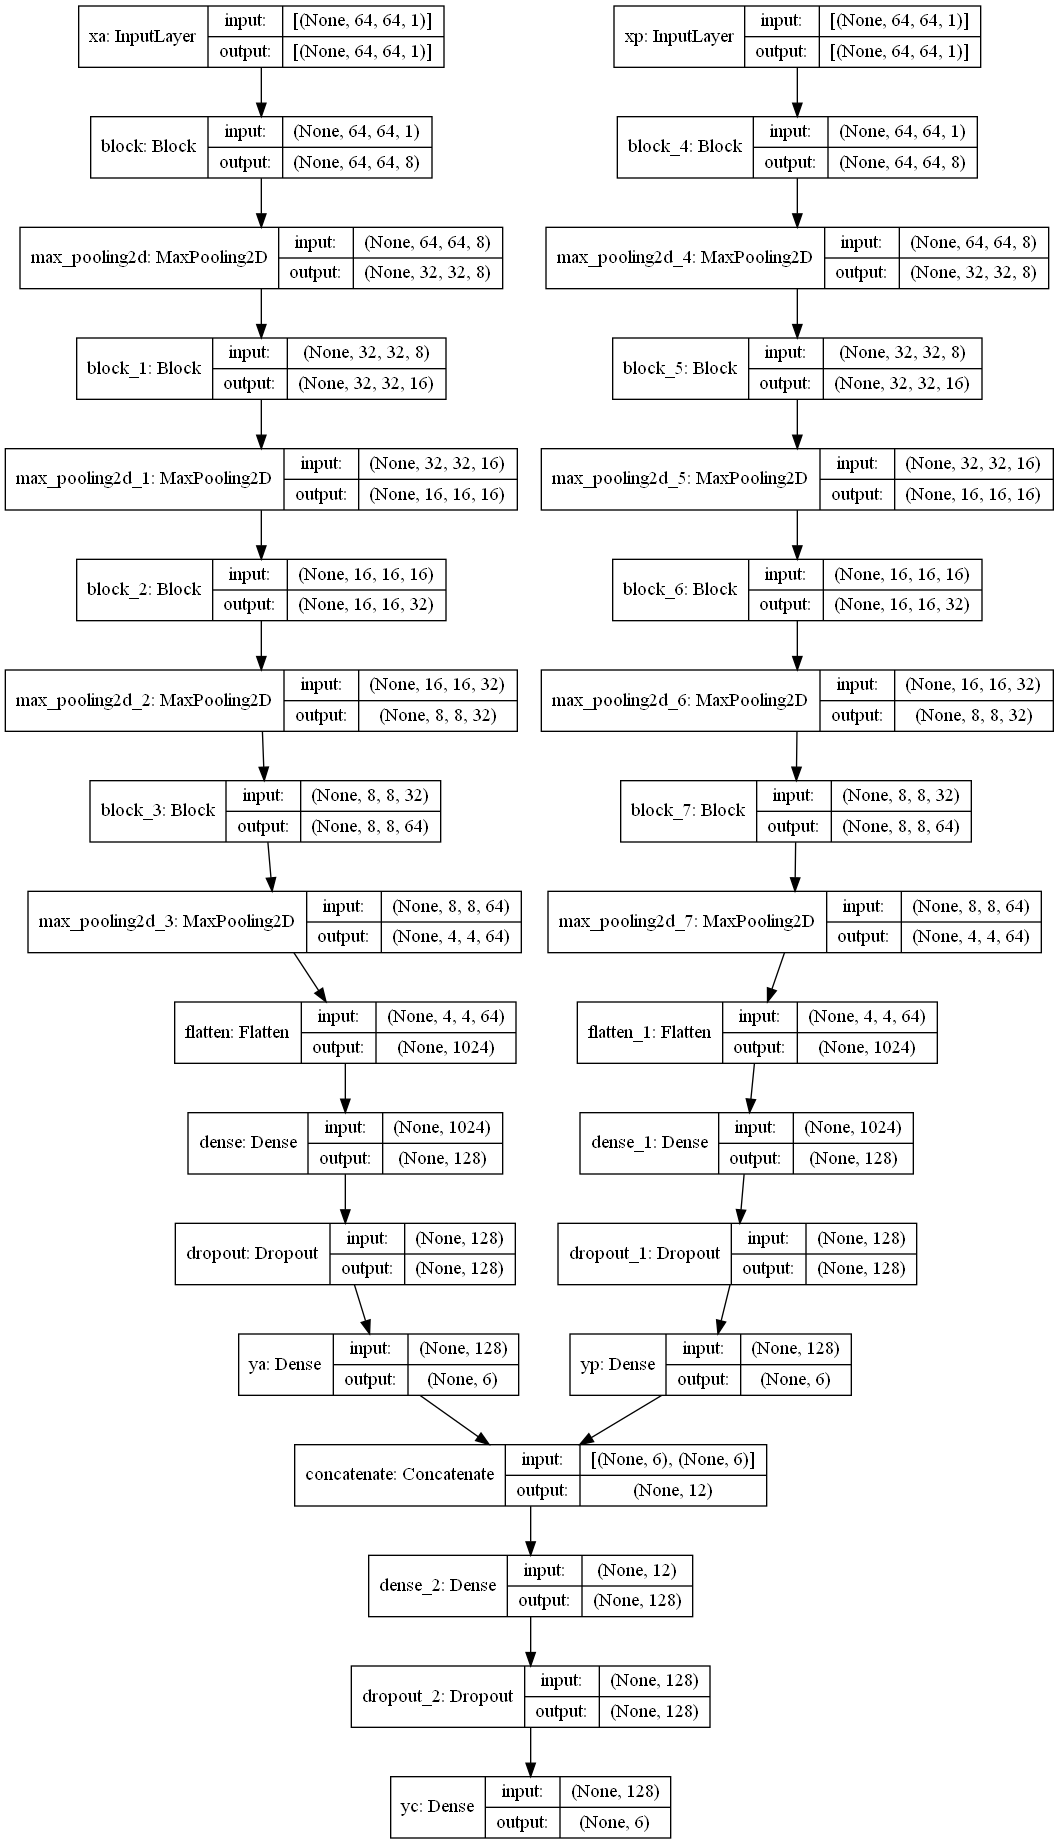

In [3]:
print('\ncreate model')

model = build_model(input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,1))
model.summary()
tf.keras.utils.plot_model(model, to_file=LOG_DIR+r'\architecture.png', show_shapes=True)

In [4]:
print('\ncreate dataset .... ')

data_Am, data_Ph, data_Lb = get_data_list(
    DIRECTORY_AM, DIRECTORY_PH, shuffle=True, seed=5)

tra_dataset = get_dataset(
    data_Am[:], data_Ph[:], data_Lb[:],
    TRAIN_BATCH_SIZE, IMAGE_HEIGHT, IMAGE_WIDTH, num_channels=1,
    shuffle=True, seed=10, one_hot=True, num_classes=6)

val_dataset = get_dataset(
    data_Am[:], data_Ph[:], data_Lb[:],
    TRAIN_BATCH_SIZE, IMAGE_HEIGHT, IMAGE_WIDTH, num_channels=1,
    shuffle=False, seed=None, one_hot=True, num_classes=6)


create dataset .... 



train model
Epoch 1/5
6/6 [==============================] - 2s 152ms/step - loss: 8.6702 - ya_loss: 3.3198 - yc_loss: 1.7538 - yp_loss: 3.5966 - ya_accuracy: 0.1667 - yc_accuracy: 0.3333 - yp_accuracy: 0.1667 - val_loss: 18.8301 - val_ya_loss: 10.3746 - val_yc_loss: 1.8214 - val_yp_loss: 6.6342 - val_ya_accuracy: 0.1667 - val_yc_accuracy: 0.3333 - val_yp_accuracy: 0.5000


INFO:tensorflow:Assets written to: .\log\model-00001-18.83\assets


INFO:tensorflow:Assets written to: .\log\model-00001-18.83\assets


INFO:tensorflow:Assets written to: .\log\best-model\assets


INFO:tensorflow:Assets written to: .\log\best-model\assets


Epoch 2/5
6/6 [==============================] - 0s 14ms/step - loss: 7.4688 - ya_loss: 4.3006 - yc_loss: 1.8046 - yp_loss: 1.3637 - ya_accuracy: 0.0000e+00 - yc_accuracy: 0.1667 - yp_accuracy: 0.8333 - val_loss: 12.1176 - val_ya_loss: 5.0489 - val_yc_loss: 1.7668 - val_yp_loss: 5.3019 - val_ya_accuracy: 0.3333 - val_yc_accuracy: 0.5000 - val_yp_accuracy: 0.5000


INFO:tensorflow:Assets written to: .\log\model-00002-12.12\assets


INFO:tensorflow:Assets written to: .\log\model-00002-12.12\assets


INFO:tensorflow:Assets written to: .\log\best-model\assets


INFO:tensorflow:Assets written to: .\log\best-model\assets


Epoch 3/5
6/6 [==============================] - 0s 13ms/step - loss: 6.6248 - ya_loss: 2.4829 - yc_loss: 1.8040 - yp_loss: 2.3379 - ya_accuracy: 0.1667 - yc_accuracy: 0.1667 - yp_accuracy: 0.3333 - val_loss: 6.5644 - val_ya_loss: 2.1303 - val_yc_loss: 1.7630 - val_yp_loss: 2.6711 - val_ya_accuracy: 0.3333 - val_yc_accuracy: 0.5000 - val_yp_accuracy: 0.3333


INFO:tensorflow:Assets written to: .\log\model-00003-6.56\assets


INFO:tensorflow:Assets written to: .\log\model-00003-6.56\assets


INFO:tensorflow:Assets written to: .\log\best-model\assets


INFO:tensorflow:Assets written to: .\log\best-model\assets


Epoch 4/5
6/6 [==============================] - 0s 13ms/step - loss: 3.0363 - ya_loss: 0.2212 - yc_loss: 1.7648 - yp_loss: 1.0502 - ya_accuracy: 0.8333 - yc_accuracy: 0.1667 - yp_accuracy: 0.6667 - val_loss: 4.8058 - val_ya_loss: 1.6874 - val_yc_loss: 1.7876 - val_yp_loss: 1.3307 - val_ya_accuracy: 0.5000 - val_yc_accuracy: 0.3333 - val_yp_accuracy: 0.3333


INFO:tensorflow:Assets written to: .\log\model-00004-4.81\assets


INFO:tensorflow:Assets written to: .\log\model-00004-4.81\assets


INFO:tensorflow:Assets written to: .\log\best-model\assets


INFO:tensorflow:Assets written to: .\log\best-model\assets


Epoch 5/5
6/6 [==============================] - 0s 13ms/step - loss: 4.8757 - ya_loss: 1.0530 - yc_loss: 1.8049 - yp_loss: 2.0179 - ya_accuracy: 0.5000 - yc_accuracy: 0.1667 - yp_accuracy: 0.5000 - val_loss: 4.2026 - val_ya_loss: 1.0304 - val_yc_loss: 1.7747 - val_yp_loss: 1.3974 - val_ya_accuracy: 0.6667 - val_yc_accuracy: 0.5000 - val_yp_accuracy: 0.6667


INFO:tensorflow:Assets written to: .\log\model-00005-4.20\assets


INFO:tensorflow:Assets written to: .\log\model-00005-4.20\assets


INFO:tensorflow:Assets written to: .\log\best-model\assets


INFO:tensorflow:Assets written to: .\log\best-model\assets


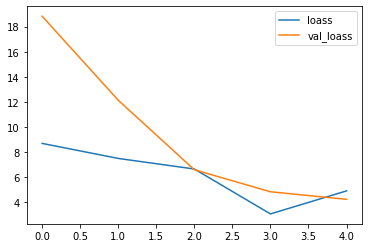

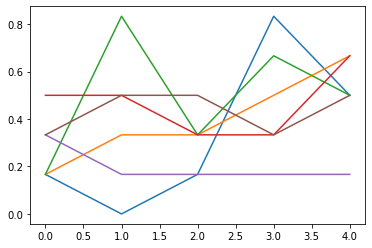

In [5]:
print('\ntrain model')

def scheduler(epoch, lr):
    print('check lr:',lr)
    if epoch < 5: return lr
    elif epoch == 50: return lr / 10
    elif epoch == 100: return lr / 10
    else: return lr

def set_callbacks():
    return [
        tf.keras.callbacks.ModelCheckpoint(LOG_DIR+r'\model-{epoch:05d}-{val_loss:.2f}'),
        tf.keras.callbacks.ModelCheckpoint(LOG_DIR+'/best-model', save_best_only=True),
        tf.keras.callbacks.TensorBoard(LOG_DIR+r'\tensorboard'),
        # tf.keras.callbacks.LearningRateScheduler(scheduler),
        tf.keras.callbacks.CSVLogger(LOG_DIR+r'\train_progress.csv')
    ]

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

his = model.fit(
    tra_dataset, validation_data=val_dataset,
    epochs=TRAIN_EPOCHS, verbose=1,
    callbacks=set_callbacks()
)

plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.legend(['loass','val_loass'], loc='upper right')
plt.savefig(LOG_DIR+r'\train_loss.png')
plt.show()

plt.plot(his.history['ya_accuracy'])
plt.plot(his.history['val_ya_accuracy'])
plt.plot(his.history['yp_accuracy'])
plt.plot(his.history['val_yp_accuracy'])
plt.plot(his.history['yc_accuracy'])
plt.plot(his.history['val_yc_accuracy'])
plt.savefig(LOG_DIR+r'\train_acc.png')
plt.show()

In [6]:
print('\nload model .....')
model = tf.keras.models.load_model(LOG_DIR+'/best-model')

print('\nevaluate model')
eva = model.evaluate(val_dataset, verbose=1)


load model .....

evaluate model
6/6 [==============================] - 1s 2ms/step - loss: 4.2026 - ya_loss: 1.0304 - yc_loss: 1.7747 - yp_loss: 1.3974 - ya_accuracy: 0.6667 - yc_accuracy: 0.5000 - yp_accuracy: 0.6667


In [7]:
_idx = 0
Lb = data_Lb[_idx]
Am = tf.io.read_file(data_Am[_idx])
Ph = tf.io.read_file(data_Ph[_idx])

Am = tf.io.decode_png(Am, channels=1)
Ph = tf.io.decode_png(Ph, channels=1)
Am = tf.image.resize(Am, (IMAGE_HEIGHT,IMAGE_WIDTH)).numpy()
Ph = tf.image.resize(Ph, (IMAGE_HEIGHT,IMAGE_WIDTH)).numpy()

Am_tensor = Am.reshape((1,IMAGE_HEIGHT,IMAGE_WIDTH,1))
Ph_tensor = Ph.reshape((1,IMAGE_HEIGHT,IMAGE_WIDTH,1))

print('\npredict model')
print('\nload model .....')
model = tf.keras.models.load_model(LOG_DIR+'/best-model')
pre = model.predict({'xa': Am_tensor, 'xp': Ph_tensor}, verbose=1)

print('\nshow predicted result')
print('ground true:', Lb)
print('    predcit:', pre['yc'][0].argmax(axis=-1))


predict model

load model .....
1/1 [==============================] - 0s 157ms/step

show predicted result
ground true: 3
    predcit: 1
